In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plume = pd.read_csv("observed_data/case_study/data.csv")
plume.head()

,Unnamed: 0,x,y,z,Concentration,counts,samples
0,351,250.0,-650.0,12.5,9.167550,43.0,"[2456306565.850002, 1645362189.4000018, 164536..."
1,354,250.0,-650.0,87.5,9.189995,97.0,"[1074910062.400001, 1074910062.400001, 1074910..."
2,369,250.0,-450.0,12.5,9.062337,197.0,"[1224385374.6499984, 1224385374.6499984, 12243..."
3,370,250.0,-450.0,37.5,8.813298,252.0,"[593528445.85, 593528445.85, 593528445.85, 593..."
4,371,250.0,-450.0,62.5,8.774371,122.0,"[598970708.6499996, 598970708.6499996, 5989707..."


In [3]:
# Change to concentrations
'''
n = number of density with units #/m^3
c = concentration or bulk mass density of a dispersed aerosol with units = kg/m^3
m = average mass of an aerosol particle with units of kg. 

c = m * n * volume
'''

vol = 3.3510321638291e-20
n = 10 ** plume["Concentration"] # number density with units #/m^3
m = 2165 # average mass of an aerosol particle with units of kg/m^3, this is the value for wet particles, but we can use 2163 kg/m^3 for salt crystals
c = m * n * vol # concentration mass density of a dispersed aerosol with units kg/m^3
c = c*10**6 # concentration mass density of a dispersed aerosol with units mg/m^3
plume["Concentration_Formula"] = c
plume.head()

,Unnamed: 0,x,y,z,Concentration,counts,samples,Concentration_Formula
0,351,250.0,-650.0,12.5,9.167550,43.0,"[2456306565.850002, 1645362189.4000018, 164536...",0.106705
1,354,250.0,-650.0,87.5,9.189995,97.0,"[1074910062.400001, 1074910062.400001, 1074910...",0.112365
2,369,250.0,-450.0,12.5,9.062337,197.0,"[1224385374.6499984, 1224385374.6499984, 12243...",0.083748
3,370,250.0,-450.0,37.5,8.813298,252.0,"[593528445.85, 593528445.85, 593528445.85, 593...",0.047199
4,371,250.0,-450.0,62.5,8.774371,122.0,"[598970708.6499996, 598970708.6499996, 5989707...",0.043153


In [4]:
# Find the range of x, y, z
# Want to find out the domain and grid size.
min_x, max_x = min(list(plume["x"])), max(list(plume["x"]))
x_ls = sorted(set(list(plume["x"])))
print(min_x, max_x, np.diff(x_ls))
min_y, max_y = min(list(plume["y"])), max(list(plume["y"]))
y_ls = sorted(set(list(plume["y"])))
print(min_y, max_y, np.diff(y_ls))
min_z, max_z = min(list(plume["z"])), max(list(plume["z"]))
z_ls = sorted(set(list(plume["z"])))
print(min_z, max_z, np.diff(z_ls))
# It follows a (10x17x8)-grid

250.0 1250.0 [100. 100. 100. 100. 100. 100. 100. 100. 100. 100.]
-950.0 750.0 [100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100.]
12.5 212.5 [25. 25. 25. 25. 25. 25. 25. 25.]


In [5]:
z_ls

[12.5, 37.5, 62.5, 87.5, 112.5, 137.5, 162.5, 187.5, 212.5]

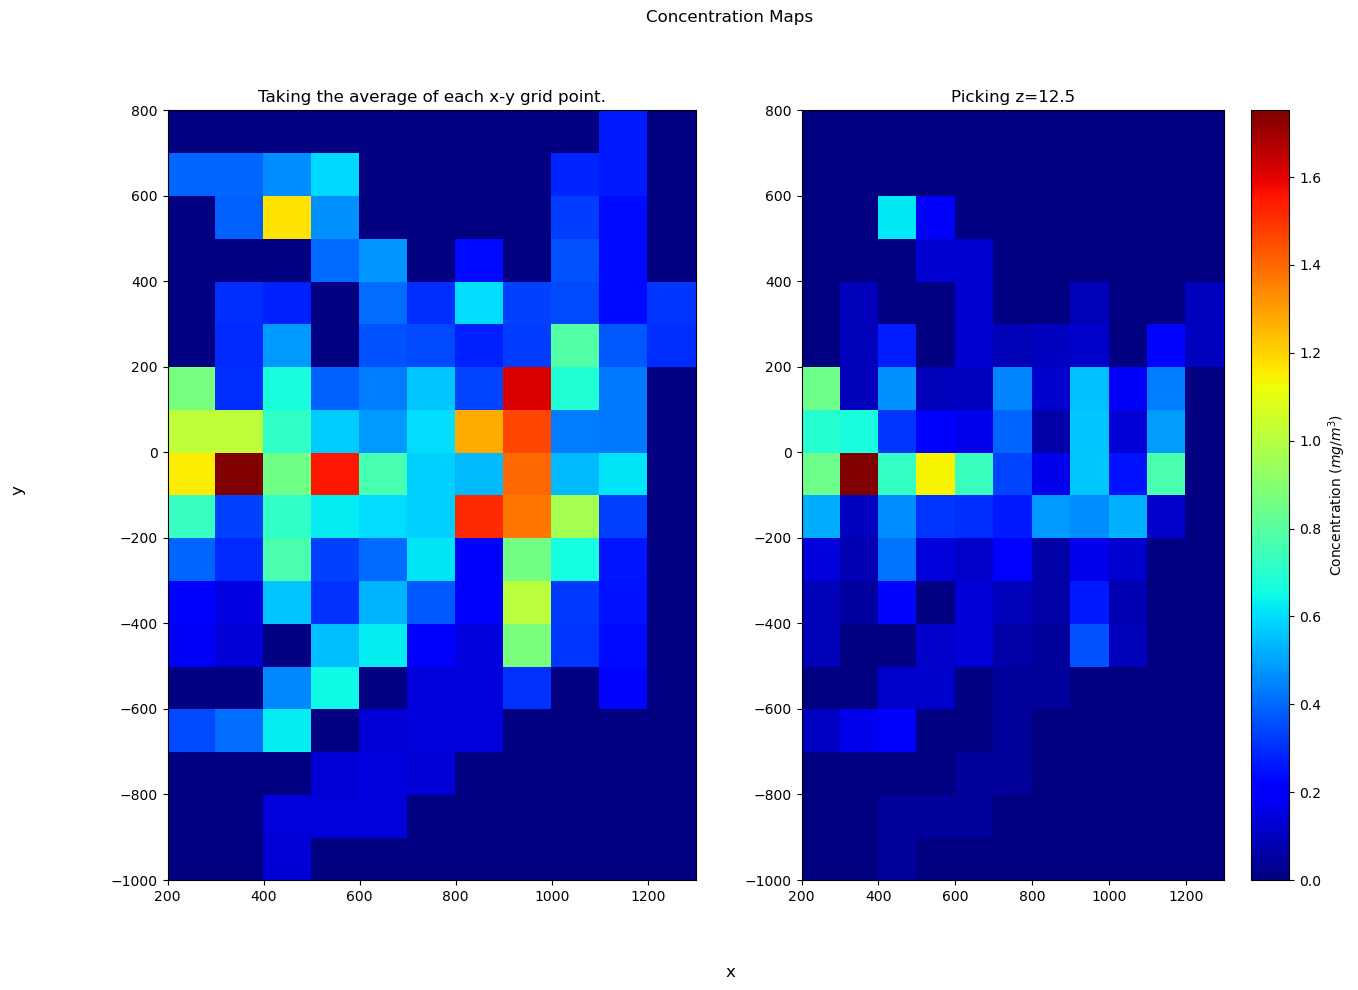

In [6]:
# Want to compare plume between the average concentration over all z-levels and when we just pick one.
x = np.linspace(min_x, max_x, 11)
y = np.linspace(min_y, max_y, 18)
X, Y = np.meshgrid(x, y)

#Taking the average concentration
plume_zaverage = plume.groupby(by=["x", "y"])["Concentration_Formula"].mean().reset_index()

# Create a zero-filled array with the same shape as the mesh
Z_average = np.zeros_like(X)

# Step 3: Map concentration values to grid
# Create a mapping from (x, y) to concentration
data_dict = {(row['x'], row['y']): row['Concentration_Formula'] for _, row in plume_zaverage.iterrows()}

# Fill Z array by checking if each grid point is in the data
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        key = (X[i, j], Y[i, j])
        Z_average[i, j] = data_dict.get(key, 0)  # Default to 0 if not found

## If we just pick one
z = 12.5
plume_onez = plume[plume["z"] == z].reset_index(drop=True)

Z_onez = np.zeros_like(X)
data_dict = {(row['x'], row['y']): row['Concentration_Formula'] for _, row in plume_onez.iterrows()}

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        key = (X[i, j], Y[i, j])
        Z_onez[i, j] = data_dict.get(key, 0)  # Default to 0 if not found


fig, axes = plt.subplots(1, 2, figsize=(15, 10))
cp = axes[0].pcolor(X, Y, Z_average, cmap='jet', shading='auto')
cp2 = axes[1].pcolor(X, Y, Z_onez, cmap='jet', shading='auto')
axes[0].set_title("Taking the average of each x-y grid point.")
axes[1].set_title("Picking z=12.5")
fig.colorbar(cp2, label='Concentration $(mg/m^3)$')
fig.supxlabel('x')
fig.supylabel('y')
fig.suptitle('Concentration Maps')
# plt.savefig("plots/case_study_comparison.png")
plt.show()

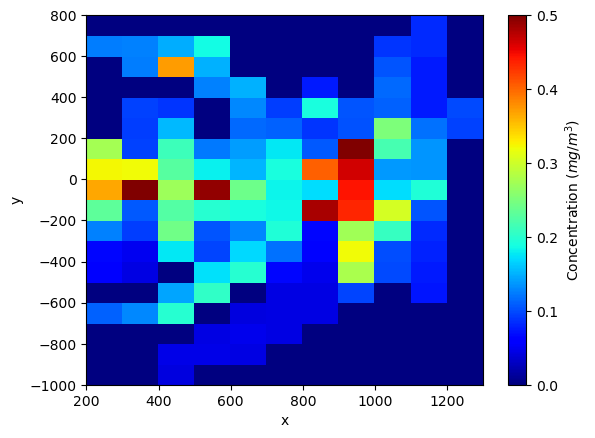

In [10]:
# Want to compare plume between the average concentration over all z-levels and when we just pick one.
x = np.linspace(min_x, max_x, 11)
y = np.linspace(min_y, max_y, 18)
X, Y = np.meshgrid(x, y)

#Taking the average concentration
plume_zaverage = plume.groupby(by=["x", "y"])["Concentration_Formula"].mean().reset_index()

# Create a zero-filled array with the same shape as the mesh
Z_average = np.zeros_like(X)

# Step 3: Map concentration values to grid
# Create a mapping from (x, y) to concentration
data_dict = {(row['x'], row['y']): row['Concentration_Formula'] for _, row in plume_zaverage.iterrows()}

# Fill Z array by checking if each grid point is in the data
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        key = (X[i, j], Y[i, j])
        Z_average[i, j] = data_dict.get(key, 0)  # Default to 0 if not found

plt.pcolor(X, Y, Z_average, cmap='jet', shading='auto', vmin=0, vmax=0.5)
plt.colorbar(label='Concentration $(mg/m^3)$')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# ## If we just pick one
# z = 12.5
# plume_onez = plume[plume["z"] == z].reset_index(drop=True)

# Z_onez = np.zeros_like(X)
# data_dict = {(row['x'], row['y']): row['Concentration_Formula'] for _, row in plume_onez.iterrows()}

# for i in range(X.shape[0]):
#     for j in range(X.shape[1]):
#         key = (X[i, j], Y[i, j])
#         Z_onez[i, j] = data_dict.get(key, 0)  # Default to 0 if not found


# fig, axes = plt.subplots(1, 2, figsize=(15, 10))
# cp = axes[0].pcolor(X, Y, Z_average, cmap='jet', shading='auto')
# cp2 = axes[1].pcolor(X, Y, Z_onez, cmap='jet', shading='auto')
# axes[0].set_title("Taking the average of each x-y grid point.")
# axes[1].set_title("Picking z=12.5")
# fig.colorbar(cp2, label='Concentration $(mg/m^3)$')
# fig.supxlabel('x')
# fig.supylabel('y')
# fig.suptitle('Concentration Maps')
# # plt.savefig("plots/case_study_comparison.png")
# plt.show()

In [12]:
def generate_solution(nx, ny, Lx, Ly, cx, cy, s):
    dx, dy = Lx/(nx-1), Ly/(ny-1)
    dt = DT
    tend = TEND
    t = 0

    cfl_x, cfl_y = cx * dt/dx, cy * dt/dy
    diff_x, diff_y = s * dt/dx**2, s * dt/dy**2

    u = np.zeros((nx+2, ny+2))
    sol = []
    source_x, source_y = 0, ny // 2
    u[source_x, source_y] = 1.0 # Cocentration starts from the central peak
    
    while t < tend:
        unew = u.copy()
        sol.append(u[1:-1, 1:-1])

         # Advection (Upwind Scheme)
        unew[1:-1, 1:-1] -= cfl_x * (u[1:-1, 1:-1] - u[1:-1, :-2])
        unew[1:-1, 1:-1] -= cfl_y * (u[1:-1, 1:-1] - u[:-2, 1:-1])
    
        # Diffusion (Central Differencing)
        unew[1:-1, 1:-1] += diff_x * (u[1:-1, 2:] - 2*u[1:-1, 1:-1] + u[1:-1, :-2])
        unew[1:-1, 1:-1] += diff_y * (u[2:, 1:-1] - 2*u[1:-1, 1:-1] + u[:-2, 1:-1])

        u = unew
        t += dt

    '''
    We transpose the axis the solution. Such that:
    - Axis 0: x
    - Axis 1: y
    - Axis 2: time
    Interpretation: For each x-grid, we have the concentration of each y-grid over time.
    Essentially, the (ny, 1200) array represents the concentration at each y over the time.
    So we have an array of size 1200 for each y. (A curve)
    '''
    sol = np.transpose(sol, (1, 2, 0))
    return np.array(sol)

In [89]:
Nx, Ny= 11, 18  # Grid points
Lx, Ly = 1.0, 1.0  # Domain size in meters
x, y = np.linspace(0, Lx, Nx), np.linspace(0, Ly, Ny)  # Centered at (0,0)
cx, cy = 0, 0
s = 5e-5
TEND = 30000
DT = 3

observed = generate_solution(Nx, Ny, Lx, Ly, cx, cy, s)

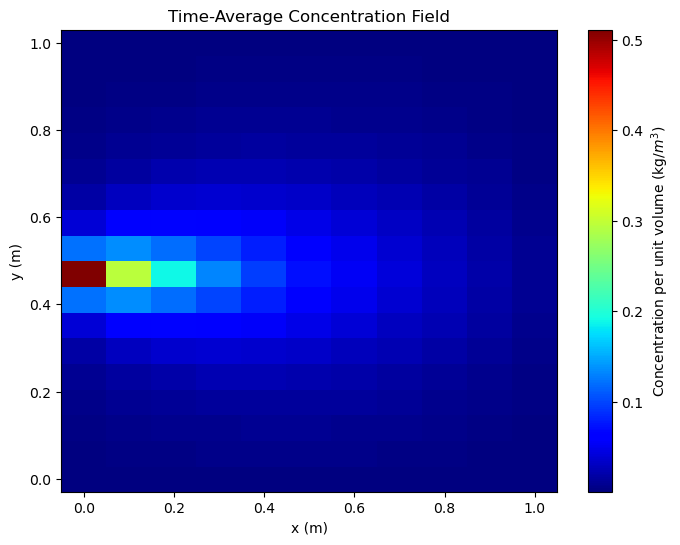

In [90]:
X, Y = np.meshgrid(x, y)
plt.figure(figsize=(8,6))
plt.pcolor(X, Y, np.mean(observed, axis=2).T, cmap='jet', shading='auto')
plt.colorbar(label="Concentration per unit volume (kg/$m^3$)")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Time-Average Concentration Field")
# plt.savefig("plots/example_observed_01tend.png")
plt.show()

In [92]:
np.mean(np.abs(Z_average - np.mean(observed, axis=2).T))

0.08237960114012347